In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error , r2_score
from sklearn.model_selection import cross_val_score
import pickle

In [2]:
df = pd.read_csv("insurance.csv")

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [4]:
df.tail()

,age,sex,bmi,children,smoker,region,expenses
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95
1337,61,female,29.1,0,yes,northwest,29141.36


here we can see that age , bmi children and expenses are numerical features


sex and region are categorical features

In [5]:
#  here we will check the missing values in our DataFrame
df.isnull().sum()


age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

###### there are no missing values in the dataset

here we can see that there are no missing values in our data frame

In [6]:
# outliers = []
# def outlier_detect(df):
    
#     threshold = 3   #75% percentile
#     mean = np.mean(df)
#     std = np.std(df)
    
#     for i in df:
#         z_score = (i - mean)/std
#         if np.abs(z_score)>threshold:
#             outliers.append(i)
#         return outliers

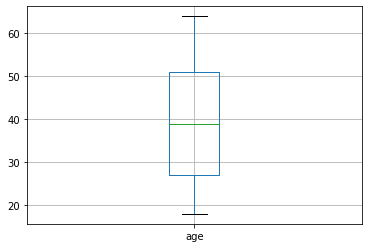

In [7]:
figure = df.boxplot(column="age")

In [8]:
df["age"].describe()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

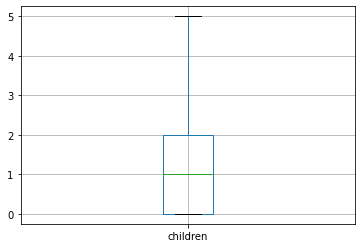

In [9]:
figure2 = df.boxplot(column="children")

In [10]:
df["children"].describe()

count    1338.000000
mean        1.094918
std         1.205493
min         0.000000
25%         0.000000
50%         1.000000
75%         2.000000
max         5.000000
Name: children, dtype: float64

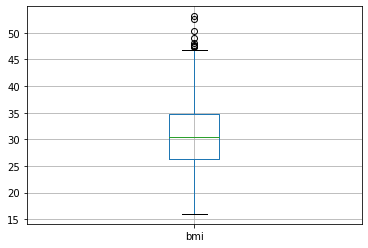

In [11]:
figure3 = df.boxplot(column="bmi")

In [12]:
df["bmi"].describe()

count    1338.000000
mean       30.665471
std         6.098382
min        16.000000
25%        26.300000
50%        30.400000
75%        34.700000
max        53.100000
Name: bmi, dtype: float64

#### from the observation observation we can see that age and children column has no outliers but in the bmi column are some of outliers are present

# EDA

<AxesSubplot:xlabel='age', ylabel='Count'>

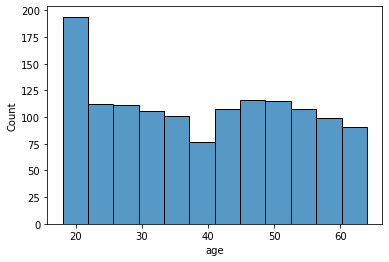

In [13]:
sns.histplot(df["age"])

C:\Users\shail\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

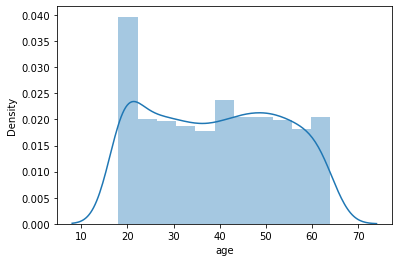

In [14]:
sns.distplot(df["age"])

In [15]:
df["age"].value_counts()

18    69
19    68
20    29
51    29
45    29
46    29
47    29
48    29
50    29
52    29
28    28
54    28
21    28
27    28
26    28
49    28
25    28
24    28
23    28
22    28
53    28
42    27
44    27
43    27
41    27
40    27
31    27
30    27
29    27
56    26
34    26
33    26
32    26
57    26
55    26
35    25
59    25
58    25
36    25
39    25
38    25
37    25
60    23
61    23
62    23
63    23
64    22
Name: age, dtype: int64

<AxesSubplot:xlabel='sex', ylabel='Count'>

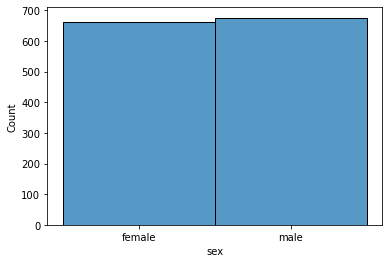

In [16]:
sns.histplot(df["sex"])

<AxesSubplot:ylabel='sex'>

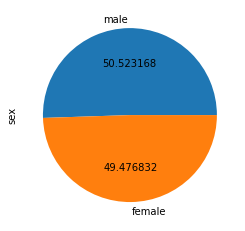

In [17]:
df["sex"].value_counts().plot(kind="pie" , autopct="%2f")

<AxesSubplot:xlabel='bmi', ylabel='Count'>

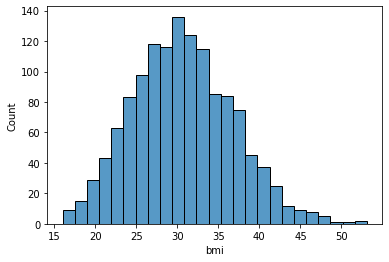

In [18]:
sns.histplot(df["bmi"])

C:\Users\shail\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='bmi', ylabel='Density'>

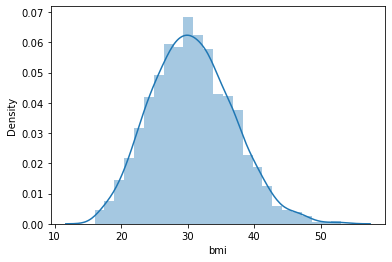

In [19]:
sns.distplot(df["bmi"])

C:\Users\shail\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='children', ylabel='count'>

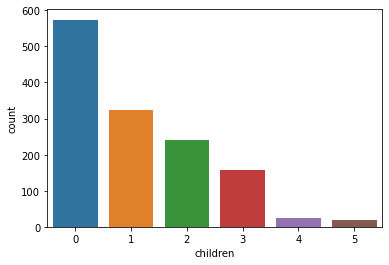

In [20]:
sns.countplot(df["children"])

C:\Users\shail\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='region', ylabel='count'>

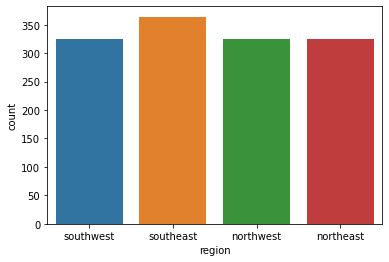

In [21]:
sns.countplot(df["region"])

<AxesSubplot:ylabel='region'>

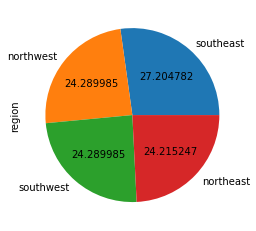

In [22]:
df["region"].value_counts().plot(kind="pie" , autopct="%2f")

In [23]:
df["region"].value_counts()

southeast    364
northwest    325
southwest    325
northeast    324
Name: region, dtype: int64

C:\Users\shail\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='smoker', ylabel='count'>

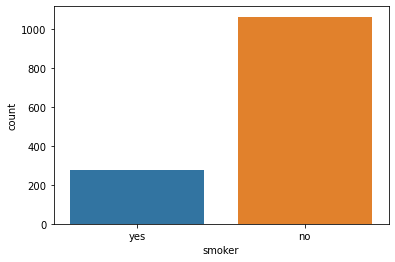

In [24]:
sns.countplot(df["smoker"])

In [25]:
label = LabelEncoder()
df["sex"] = label.fit_transform(df["sex"])
df["smoker"] = label.fit_transform(df["smoker"])

In [26]:
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,0,27.9,0,1,southwest,16884.92
1,18,1,33.8,1,0,southeast,1725.55
2,28,1,33.0,3,0,southeast,4449.46
3,33,1,22.7,0,0,northwest,21984.47
4,32,1,28.9,0,0,northwest,3866.86


In [27]:
region = pd.get_dummies(df["region"], drop_first=True)

In [28]:
data = pd.concat([df, region], axis=1)

In [29]:
data.head()

,age,sex,bmi,children,smoker,region,expenses,northwest,southeast,southwest
0,19,0,27.9,0,1,southwest,16884.92,0,0,1
1,18,1,33.8,1,0,southeast,1725.55,0,1,0
2,28,1,33.0,3,0,southeast,4449.46,0,1,0
3,33,1,22.7,0,0,northwest,21984.47,1,0,0
4,32,1,28.9,0,0,northwest,3866.86,1,0,0


In [30]:
data.drop(["region"], axis=1, inplace=True)

In [31]:
data.head()

,age,sex,bmi,children,smoker,expenses,northwest,southeast,southwest
0,19,0,27.9,0,1,16884.92,0,0,1
1,18,1,33.8,1,0,1725.55,0,1,0
2,28,1,33.0,3,0,4449.46,0,1,0
3,33,1,22.7,0,0,21984.47,1,0,0
4,32,1,28.9,0,0,3866.86,1,0,0


In [32]:
x = data.drop("expenses", axis=1)

In [33]:
y = data["expenses"]

In [34]:
x.head()

,age,sex,bmi,children,smoker,northwest,southeast,southwest
0,19,0,27.9,0,1,0,0,1
1,18,1,33.8,1,0,0,1,0
2,28,1,33.0,3,0,0,1,0
3,33,1,22.7,0,0,1,0,0
4,32,1,28.9,0,0,1,0,0


In [35]:
y

0       16884.92
1        1725.55
2        4449.46
3       21984.47
4        3866.86
          ...   
1333    10600.55
1334     2205.98
1335     1629.83
1336     2007.95
1337    29141.36
Name: expenses, Length: 1338, dtype: float64

In [36]:
x_train , x_test , y_train , y_test = train_test_split(x, y , random_state=42)

In [37]:
len(x_train)

1003

In [38]:
len(x_test)

335

In [39]:
lin_reg = LinearRegression()

In [40]:
lin_reg.fit(x_train , y_train)

LinearRegression()

In [41]:
score = cross_val_score(lin_reg, x, y, scoring=None , cv=5 )
score

array([0.76148215, 0.70650918, 0.7780752 , 0.73273236, 0.75559751])

In [42]:
score.mean()

0.746879280539993

In [43]:
y_pred1 = lin_reg.predict(x_test)

In [44]:
y_pred1

array([ 8959.6084306 ,  7046.45362801, 36891.48904809,  9506.90730857,
       26954.19089842, 10879.74213737,    83.72319655, 17046.37987336,
        1007.26095132, 11305.48481656, 28036.21861587,  9447.62841339,
        5092.95931077, 38386.14928012, 40230.32637772, 37029.22472316,
       15164.87588709, 35775.06231692,  8996.43931864, 31439.69748057,
        3792.14320072, 10141.90726745,  2309.8212006 ,  7097.73227673,
       11315.61512709, 12991.81552164, 14505.87498443,  6126.41375662,
        9954.71007435,  2025.92092508,  9049.47632417, 13110.09528025,
        4390.81973429,  3370.10730059,  4417.94355211, 13114.27087227,
        1850.66898786,  8751.77817571, 33251.23796365, 32489.0073563 ,
        3786.56823819,  4360.16328021, 14132.20537616, 11533.36701176,
        8711.23338962, 12135.25280246,  5229.66732583,  3028.9307404 ,
       35431.85494545,  9075.7986008 , 15770.28626856,  2214.80440663,
       12386.76583478,  1447.96559303, 13352.70944012, 12648.60815017,
      

In [45]:
print("MSE :", mean_squared_error(y_pred1 , y_test))
print("MAE :" , mean_absolute_error(y_pred1, y_test))
print("R score :", r2_score(y_pred1, y_test))

MSE : 35116554.28433196
MAE : 4243.465741508583
R score : 0.6843648738685674


# Decision Tree

In [46]:
ds_tree = DecisionTreeRegressor()
ds_tree.fit(x_train , y_train)
y_pred2 = ds_tree.predict(x_test)

In [47]:
y_pred2

array([ 9447.25,  4571.41, 28950.47, 30284.64, 33732.69, 11326.71,
        1737.38, 14692.67,  2457.5 , 10702.64, 19362.  ,  6600.36,
        4040.56, 46200.99, 48970.25, 48885.14,  9549.57, 41676.08,
        8515.76, 21348.71,  4877.98,  8520.03,  1639.56,  2166.73,
       10702.64, 10338.93, 13228.85, 18157.88,  9447.25, 11774.16,
        7243.81, 12430.95,  2026.97,  4906.41,  3490.55,  8342.91,
        2331.52,  6849.03, 22218.11, 37742.58,  4561.19,  2639.04,
       11394.07, 12323.94,  4949.76, 12913.99,  4830.63,  3906.13,
       40273.65,  4673.39, 13887.97,  2801.26,  6393.6 ,  1708.  ,
       10976.25, 10600.55,  3268.85, 39983.43, 12430.95, 29186.48,
       13393.76,  4686.39, 31620.  ,  7729.65,  8280.62,  4337.74,
       21472.48,  7742.11,  2842.76,  1526.31,  5488.26,  7633.72,
        9722.77, 23563.02,  8083.92,  4399.73,  4661.29, 12629.17,
        3981.98,  9447.25,  1532.47, 28950.47,  5253.52, 37484.45,
       39722.75, 41919.1 ,  4949.76, 10976.25,  8219.2 , 11253

In [48]:
print("MSE :", mean_squared_error(y_pred2 , y_test))
print("MAE :" , mean_absolute_error(y_pred2, y_test))
print("R score :", r2_score(y_pred2, y_test))

MSE : 42409805.73934419
MAE : 2855.3357910447758
R score : 0.7470995979787061


# Random Forest 

In [49]:
rf_reg = RandomForestRegressor()
rf_reg.fit(x_train , y_train)
y_pred3 = rf_reg.predict(x_test)

In [50]:
y_pred3

array([11061.0917 ,  5101.8016 , 28300.6685 , 12186.7931 , 34206.9054 ,
        7539.1805 ,  2099.562  , 14384.6091 ,  5783.7216 , 11034.0876 ,
       19100.3152 ,  7140.8059 ,  4842.9152 , 45478.1077 , 48466.9708 ,
       45004.2571 , 10874.421  , 42550.3379 ,  9772.6308 , 23465.7776 ,
        8106.0798 ,  8795.6    ,  2179.1077 ,  2185.3439 , 11891.6439 ,
       11130.8508 , 14185.3294 ,  6901.9003 , 11947.2061 ,  6472.40924,
        7447.3049 , 12128.6865 ,  3160.5121 ,  5751.4117 ,  3747.0489 ,
        9863.0316 ,  3101.8943 ,  8631.0398 , 24133.8888 , 39894.3292 ,
        6824.8954 ,  3859.6313 , 13586.0038 , 15667.8051 ,  5843.4728 ,
       16161.2852 , 15980.9875 ,  8758.451  , 42054.3342 ,  8883.8074 ,
       14097.8475 ,  5012.35864,  7529.6657 ,  1692.445  , 11332.8028 ,
       10555.8273 ,  3441.2489 , 43944.6835 , 11923.2369 , 14039.4363 ,
       13765.7707 ,  6895.2464 , 21659.8738 ,  8132.7409 , 10495.4044 ,
        6382.0877 , 18664.7401 , 13758.17   ,  7274.5895 ,  2889

In [51]:
print("MSE :", mean_squared_error(y_pred3 , y_test))
print("MAE :" , mean_absolute_error(y_pred3, y_test))
print("R score :", r2_score(y_pred3, y_test))

MSE : 22651182.04548407
MAE : 2621.5912276716417
R score : 0.84240411580333


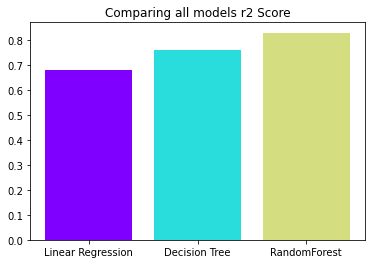

In [52]:
r2_score = np.array([0.68 , 0.76, 0.83  ])
labels = np.array(["Linear Regression" , "Decision Tree" , "RandomForest"])
index = np.argsort(r2_score)
color = plt.cm.rainbow(np.linspace(0, 1, 4))

plt.bar(range(len(index)) , r2_score[index], color = color )
plt.xticks(range(0,3),["Linear Regression" , "Decision Tree" , "RandomForest"])
plt.title("Comparing all models r2 Score")
plt.show()

In [53]:
# open a file where you want to store
file = open("random_forest_regressor.pkl", "wb")

# dump information to that file
pickle.dump("rf_random", file)